In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('C:/Users/lenovo/aapl.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.tail(220)

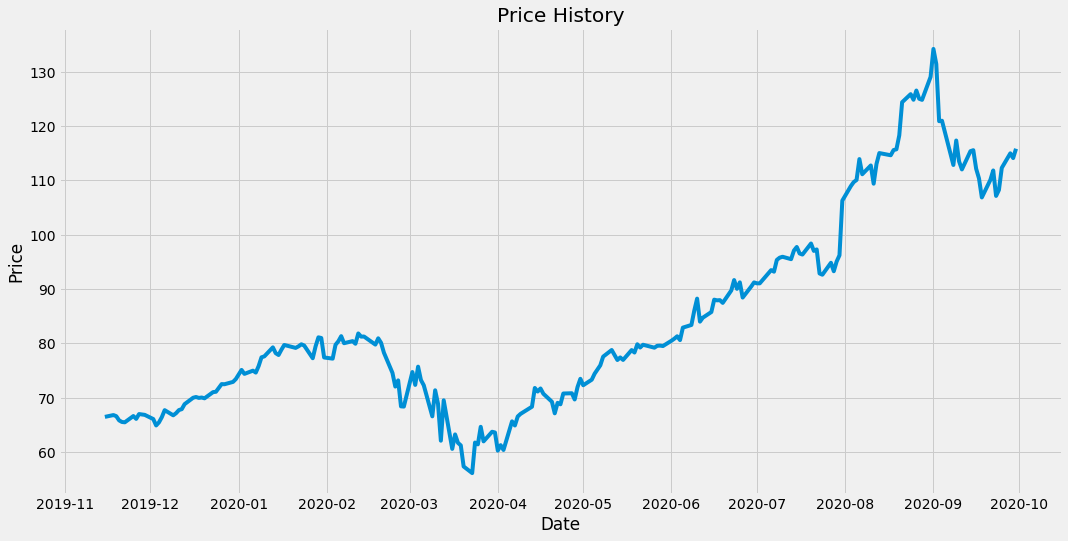

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price')
plt.title('Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
shortEMA =df.Close.ewm(span=12 , adjust=False).mean()
longEMA =df.Close.ewm(span=26 , adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9 , adjust = False).mean()

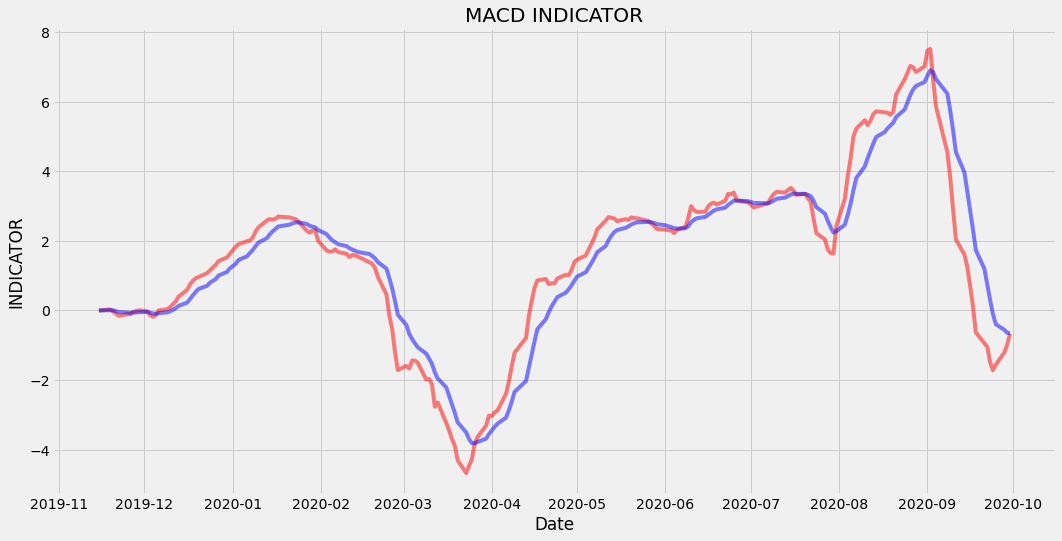

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df.index , MACD , label='MACD' , color='red' , alpha=0.5)
plt.plot(df.index , signal , label='Signal' , color='blue' , alpha=0.5)
plt.title('MACD INDICATOR')
plt.xlabel('Date')
plt.ylabel('INDICATOR')
plt.show()

In [6]:
df['MACD']=MACD
df['signal line']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal line
2019-11-15,2019-11-15,65.919998,66.445000,65.752502,66.440002,65.984779,100206400,0.000000,0.000000
2019-11-18,2019-11-18,66.449997,66.857498,66.057503,66.775002,66.317490,86703200,0.026724,0.005345
2019-11-19,2019-11-19,66.974998,67.000000,66.347504,66.572502,66.116371,76167200,0.031203,0.010516
2019-11-20,2019-11-20,66.385002,66.519997,65.099998,65.797501,65.346687,106234400,-0.027467,0.002920
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,65.053703,121395200,-0.096653,-0.016995
...,...,...,...,...,...,...,...,...,...
2020-09-24,2020-09-24,105.169998,110.250000,105.000000,108.220001,108.220001,167743300,-1.717930,-0.099678
2020-09-25,2020-09-25,108.430000,112.440002,107.669998,112.279999,112.279999,149981400,-1.561932,-0.392129
2020-09-28,2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400,-1.208123,-0.555328
2020-09-29,2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200,-0.986556,-0.641573


In [7]:
def buy_sell(signal):
    buy=[]
    sell=[]
    f = -1
    for i in range(0 , len(signal)):
        if signal['MACD'][i] > signal['signal line'][i]:
            sell.append(np.nan)
            if f != 1:
                buy.append(signal['Close'][i])
                f=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['signal line'][i]:
            buy.append(np.nan)
            if f != 0:
                sell.append(signal['Close'][i])
                f=0
            else:
                sell.append(np.nan) 
                
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return  buy , sell  

In [8]:
a = buy_sell(df)
df['Buy_Signal'] = a[0]
df['Sell_Signal'] = a[1]

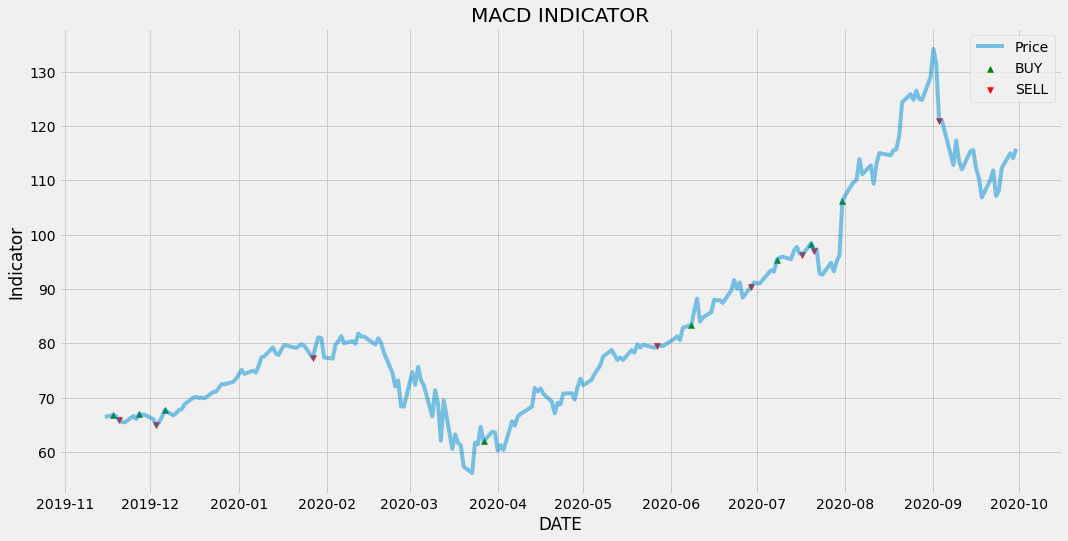

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(df.index , df['Buy_Signal'] , color='green', label='BUY' , marker='^')
plt.scatter(df.index , df['Sell_Signal'] , color='red', label='SELL' , marker='v')
plt.plot(df['Close'],label='Price',alpha = 0.5)
plt.title('MACD INDICATOR')
plt.xlabel('DATE')
plt.ylabel('Indicator')
plt.legend()
plt.show()